In [6]:
import sys
from pathlib import Path
project_root = Path().resolve().parent
sys.path.append(str(project_root))

import numpy as np
import pandas as pd

from utils.insurance_pipeline import build_X_y

In [7]:
X, y, df_clean = build_X_y("../data/insurance.csv", include_bmi_smoker=True)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = lr.predict(X_test)

# Coeffeicient of determination
r2 = r2_score(y_test, y_pred)

# Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

r2, rmse, mae


(0.8368819071407063, np.float64(0.38910533374228423), 0.2479852192555618)

In [15]:
coef_df = (
    pd.DataFrame({
        "feature": X.columns,
        "coefficient": lr.coef_
    })
    .sort_values("coefficient", key=abs, ascending=False)
)

coef_df


,feature,coefficient
5,region_southeast,-0.127533
6,region_southwest,-0.105709
2,children,0.100424
3,smoker_flag,0.072781
7,bmi_smoker,0.047983
4,region_northwest,-0.045883
0,age,0.034459
1,bmi,0.002771


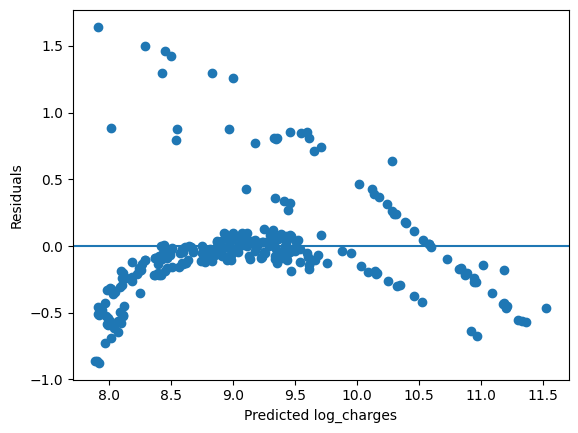

In [19]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted log_charges")
plt.ylabel("Residuals")
plt.show()

### Document

- Smoking related featuers have the srtongest impact
- Regional effects are present but secondary
- Age and children contribute modestly
- BMI alone has small dirtect effect but its impat is amplified through the smoker interaction
- R² = 0.84
- RMSE = 0.39
- MAE = 0.25
